In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

### Westernized samples from [curatedMetagenomicsData](http://bioconductor.org/packages/release/data/experiment/html/curatedMetagenomicData.html) package

In [2]:
west_count = pd.read_csv("curated_metagenomics/data/westernized_count.csv", index_col=0)

Choosing randomly 40 samples

In [3]:
west_count = west_count.sample(40, axis=1, random_state=42)

In [4]:
west_ref = list(set([i[0] for i in list(west_count.columns.str.split("."))]))

### Non-westernized samples from [curatedMetagenomicsData](http://bioconductor.org/packages/release/data/experiment/html/curatedMetagenomicData.html) package

In [5]:
non_west_count = pd.read_csv("curated_metagenomics/data/non_westernized_count.csv", index_col=0)

In [6]:
non_west_count = non_west_count.sample(40, axis=1, random_state=42)

In [7]:
non_west_count.shape

(2579, 40)

In [8]:
non_west_ref = list(set([i[0] for i in list(non_west_count.columns.str.split("."))]))

In [9]:
refs = list(set(west_ref + non_west_ref))

In [10]:
with open("reference.txt", 'w') as fw:
    for i in refs:
        fw.write(f"{i}\n")

#### Exporting samples used to csv

In [11]:
western_meta = pd.read_csv("curated_metagenomics/westernized_metadata.csv", index_col=1)

In [12]:
non_western_meta = pd.read_csv("curated_metagenomics/non_westernized_metadata.csv", index_col=1)

In [13]:
used_samples = western_meta.loc[west_count.columns,:]

In [14]:
used_samples = used_samples.append(non_western_meta.loc[non_west_count.columns,:])

In [15]:
used_samples = used_samples.loc[:,['non_westernized','studyID','subjectID','NCBI_accession']]

In [16]:
used_samples.to_csv("curated_metagenomics_data.csv")

### Sediment samples from Archaelogical sediments (generated using [metaphlan-nf](https://github.com/maxibor/metaphlan-nf))

In [17]:
sediment_count = pd.read_csv("PRJEB18629/data/sediment_count.csv", index_col=1).drop("Unnamed: 0", 1).sample(40, axis=1, random_state=42)

### Sediment samples from [coproID](https://peerj.com/articles/9001/) study (generated using [metaphlan-nf](https://github.com/maxibor/metaphlan-nf))

In [30]:
coproid_sedi = pd.read_csv("coproid_sediments/metaphlan_taxon_table.csv", index_col=1).drop("Unnamed: 0", 1).rename(columns={'ECO004_D0101_SG1_1_S0':'ECO004'})

In [31]:
coproid_sedi

,CBA001,ECO004,DRL001,BRF001,TRO001,LEI010,MLP001,CMN001
Taxon,,,,,,,,
k__Bacteria,17209108.0,17822197.0,14959075.0,18426031.0,15740372.0,10862869.0,10564919.0,15278430.0
k__Bacteria|p__Actinobacteria,9142336.0,4957632.0,1479418.0,16817002.0,5887626.0,625525.0,363890.0,5546261.0
k__Bacteria|p__Proteobacteria,7712525.0,9931609.0,10523279.0,1241700.0,4049770.0,10237343.0,8398476.0,9363784.0
k__Bacteria|p__Acidobacteria,354246.0,2633128.0,2549891.0,262652.0,4056181.0,0.0,0.0,368384.0
k__Bacteria|p__Actinobacteria|c__Actinobacteria,9142336.0,4957632.0,1479418.0,16817002.0,5887626.0,625525.0,363890.0,5546261.0
...,...,...,...,...,...,...,...,...
k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Comamonadaceae|g__Polaromonas|s__Polaromonas_unclassified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58740.0
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Promicromonosporaceae|g__Promicromonospora|s__Promicromonospora_sukumoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10924.0
k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae|g__Paracoccus|s__Paracoccus_denitrificans|t__Paracoccus_denitrificans_unclassified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312818.0


### Marsha's samples

In [34]:
import os

In [35]:
def get_samp_basename(samp_name):
    return("_".join(samp_name.split("_")[0:2]))

In [36]:
def read_sample(samp_name):
    return(pd.read_csv("wibowo_mp/data/"+samp_name, 
                       sep="\t", index_col="#SampleID")
           .rename(columns={'Metaphlan2_Analysis':get_samp_basename(samp_name)}))

In [37]:
wib_metadata = pd.read_csv("wibowo_mp/samples_metadata.txt", sep="\t", index_col=0)

In [38]:
wib_metadata['total_reads'] = wib_metadata["Number of reads (pair 1)"] +  wib_metadata['Number of reads (pair 2)']

In [39]:
soil_samp = ['Lib4_10','Lib4_11','Lib4_12']

In [40]:
wib_samp = [i for i in os.listdir("wibowo_mp/data/")]

In [41]:
wib = read_sample(wib_samp[0])

In [42]:
for i in wib_samp[1:]:
    wib = wib.merge(read_sample(i), left_index=True, right_index=True, how='outer')

In [43]:
wib = wib.fillna(0)

In [44]:
for col in wib.columns:
    wib[col] = wib[col]/100*wib_metadata.loc[col,'total_reads']

In [45]:
wib_analysis = wib.copy(deep=True)

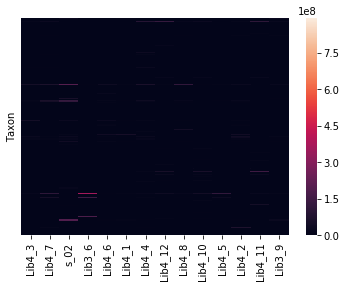

In [46]:
ax = sns.heatmap(wib_analysis, yticklabels=False)
ax.set(ylabel='Taxon')
fig = ax.get_figure()
fig.savefig("wib_heatmap.png", dpi=300)

In [47]:
phyl_count = wib_analysis.filter(axis=0,regex=".*(p__[a-zA-Z]+)$").T

In [48]:
phyl_count.columns = [i[-1] for i in list(phyl_count.columns.str.split("p__"))]

In [49]:
phyl_count_tall = phyl_count.reset_index().melt(id_vars='index', var_name='phylum')

In [50]:
phyl_count_tall.head()

,index,phylum,value
0,Lib4_3,Euryarchaeota,8.172766e+05
1,Lib4_7,Euryarchaeota,7.876174e+04
2,s_02,Euryarchaeota,2.577621e+07
3,Lib3_6,Euryarchaeota,3.712323e+04
4,Lib4_6,Euryarchaeota,1.767970e+06


/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: wib_phylums.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


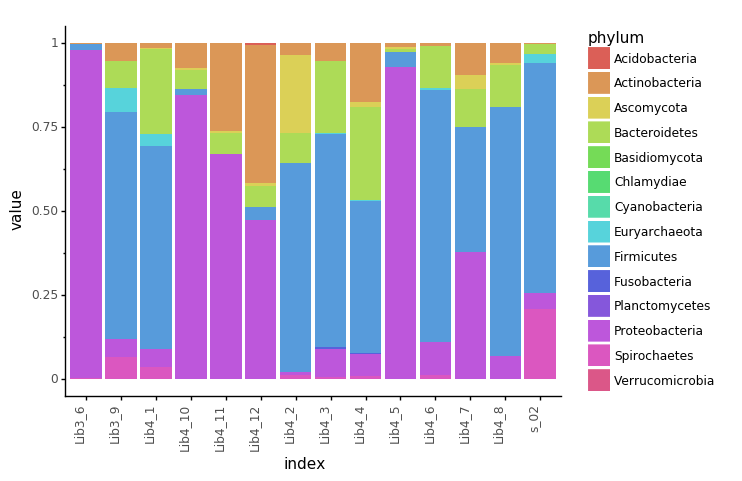

<ggplot: (-9223363295760015686)>

In [51]:
g = ggplot(phyl_count_tall, aes(x='index', y='value', fill='phylum')) 
g += geom_bar(stat='identity', position='fill')
g += theme_classic()
g += theme(axis_text_x = element_text(angle = 90, hjust = 1))
g.save("wib_phylums.png",dpi=300)
g

### Merging all samples

In [52]:
all_samp = (west_count.merge(non_west_count, left_index=True, right_index=True, how='outer')
            .merge(sediment_count, left_index=True, right_index=True, how='outer')
            .merge(wib, left_index=True, right_index=True, how='outer')
            .merge(coproid_sedi, left_index=True, right_index=True, how='outer').fillna(0))

In [53]:
all_samp.shape

(6584, 142)

Keeping only Taxons that occur in more than 0.1% of samples

In [58]:
all_samp = all_samp.loc[all_samp.astype(bool).sum(axis=1) >= int(all_samp.shape[1]/1000),:]

Keeping only Taxons that have a abundance greater than 0.1% in more than one sample

In [59]:
abundance_greater = all_samp/all_samp.sum(axis=0) > (0.1/100)

In [60]:
filtered_sample_abundance = abundance_greater.sum(axis=1) > 1

In [61]:
all_samp = all_samp.loc[filtered_sample_abundance,:]

Keeping only samples that have more 10000 mapping reads

In [62]:
all_samp = all_samp.loc[:,all_samp.sum(axis=0) >= 10000]

In [63]:
all_samp.shape

(527, 140)

### Preparing metadata 

In [65]:
meta_west = pd.Series(index=west_count.columns, data=['westernized_humans']*west_count.shape[1]).to_frame(name='Env')
meta_west['SourceSink'] = ["source"]*west_count.shape[1]

In [66]:
meta_non_west = pd.Series(index=non_west_count.columns, data=['non_westernized_humans']*non_west_count.shape[1]).to_frame(name='Env')
meta_non_west['SourceSink'] = ["source"]*non_west_count.shape[1]

In [67]:
meta_sediment = pd.Series(index=sediment_count.columns, data=['archeo_sediment']*sediment_count.shape[1]).to_frame(name='Env')
meta_sediment['SourceSink'] = ["source"]*sediment_count.shape[1]

In [69]:
meta_coproid = pd.Series(index=coproid_sedi.columns, data=['archeo_sediment']*coproid_sedi.shape[1]).to_frame(name='Env')
meta_coproid['SourceSink'] = ["source"]*coproid_sedi.shape[1]

In [71]:
meta_wib_sink = pd.Series(index=wib.columns, data=["-"]*wib.shape[1]).to_frame(name='Env')
meta_wib_sink['SourceSink'] = ['sink']*wib.shape[1]
meta_wib_sink.drop(soil_samp, axis=0, inplace=True)

In [72]:
meta_wib_source = pd.Series(index=soil_samp, data=['archeo_sediment']*len(soil_samp)).to_frame(name="Env")
meta_wib_source['SourceSink'] = ['source']*len(soil_samp)

In [73]:
meta = meta_west.append(meta_non_west).append(meta_wib_sink).append(meta_sediment).append(meta_wib_source).append(meta_coproid)

In [74]:
meta = meta[['SourceSink','Env']]

Checking for concordance between metadata and data

In [75]:
all_samp=all_samp[meta.index.intersection(all_samp.T.index)]

In [76]:
all_samp = all_samp.astype(int)

In [77]:
meta = meta.loc[meta.index.intersection(all_samp.T.index),:]

In [78]:
meta.Env.value_counts()

archeo_sediment           49
non_westernized_humans    40
westernized_humans        40
-                         11
Name: Env, dtype: int64

### Exporting to csv

In [79]:
all_samp.to_csv("all_samp_st2.tsv", sep="\t", index_label='Taxon', )

In [80]:
meta.to_csv("labels_st2.tsv", sep="\t", index_label='#SampleID')

### Converting counts file to biom format for [SourceTracker2](https://github.com/biota/sourcetracker2)

In [81]:
!biom convert -i all_samp_st2.tsv -o all_samp_st2.biom --table-type="Taxon table" --to-hdf5

Minimum read count for SourceTracker rarefaction depth

In [82]:
all_samp.sum(axis=0).min()

11148

### Preparing data for [SourcePredict](https://github.com/maxibor/sourcepredict)

In [83]:
import re
import ete3

In [130]:
west_count = pd.read_csv("curated_metagenomics/data/westernized_count.csv", index_col=0).sample(100, axis=1, random_state=42)

In [131]:
non_west_count = pd.read_csv("curated_metagenomics/data/non_westernized_count.csv", index_col=0).sample(100, axis=1, random_state=42)

In [132]:
sediment_count = pd.read_csv("PRJEB18629/data/sediment_count.csv", index_col=1).drop("Unnamed: 0", 1)

In [133]:
coproid_sedi = pd.read_csv("coproid_sediments/metaphlan_taxon_table.csv", index_col=1).drop("Unnamed: 0", 1).rename(columns={'ECO004_D0101_SG1_1_S0':'ECO004'})

In [134]:
taxon_counts = (west_count.merge(non_west_count, left_index=True, right_index=True, how='outer')
               .merge(sediment_count, left_index=True, right_index=True, how='outer')
               .merge(wib, left_index=True, right_index=True, how='outer')
               .merge(coproid_sedi, left_index=True, right_index=True).fillna(0))

In [135]:
regex = re.compile(".*s__(\w*)\.*")

In [136]:
for i in list(taxon_counts.index):
    gen = re.findall(regex, i)
    if len(gen) > 0:
        gen = gen[0]
    else:
        gen = ""
    taxon_counts.loc[i,'species'] = gen

In [137]:
taxon_counts['species'] = taxon_counts.species.str.replace("_", " ")

In [138]:
taxon_counts= taxon_counts.groupby("species").sum().drop("")

In [142]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

In [143]:
taxkey = pd.Series({k:v[0] for (k, v) in ncbi.get_name_translator(taxon_counts.index).items()}, name="TAXID")

In [144]:
def check_bacterial_species(taxid):
    rnk = list(ncbi.get_rank([taxid]).values())
    is_bacteria = ('Bacteria' in ncbi.get_taxid_translator(ncbi.get_lineage(taxid)).values())
    if len(rnk) == 1 and rnk[0] == 'species' and is_bacteria:
        return(True)
    else:
        return(False)

In [145]:
taxkey=taxkey.loc[taxkey.apply(check_bacterial_species)]

In [146]:
taxid_count = taxon_counts.merge(taxkey, left_index=True, right_index=True)

In [147]:
taxid_count = taxid_count.set_index("TAXID", drop=True)

In [149]:
taxid_count = taxid_count.loc[:,taxid_count.sum(axis=0) > 1]

### Subsample normalization

In [101]:
taxid_count = ((taxid_count/taxid_count.sum(axis=0)*10000)).fillna(0).astype(int)

In [102]:
taxid_count = taxid_count.loc[taxid_count.sum(axis=1)!=0,:]

In [103]:
sink_count = taxid_count.loc[:,meta_wib_sink.index]

In [104]:
source_count = taxid_count.drop(meta_wib_sink.index, axis=1)

Labels

In [109]:
meta_west2 = pd.Series(index=west_count.columns, data=['westernized_humans']*west_count.shape[1]).to_frame(name='Env')
meta_west2['SourceSink'] = ["source"]*west_count.shape[1]
meta_non_west2 = pd.Series(index=non_west_count.columns, data=['non_westernized_humans']*non_west_count.shape[1]).to_frame(name='Env')
meta_non_west2['SourceSink'] = ["source"]*non_west_count.shape[1]
meta_sediment2 = pd.Series(index=sediment_count.columns, data=['archeo_sediment']*sediment_count.shape[1]).to_frame(name='Env')
meta_sediment2['SourceSink'] = ["source"]*sediment_count.shape[1]
meta_coproid = pd.Series(index=coproid_sedi.columns, data=['archeo_sediment']*coproid_sedi.shape[1]).to_frame(name='Env')
meta_coproid['SourceSink'] = ['source']*coproid_sedi.shape[1]
meta = meta_west2.append(meta_non_west2).append(meta_wib_sink).append(meta_sediment2).append(meta_wib_source).append(meta_coproid)

In [121]:
labels = meta.query("SourceSink != 'sink'").drop("SourceSink", axis=1).rename(columns={'Env':'labels'})

In [111]:
labels = labels.loc[labels.index.intersection(source_count.T.index),:]

In [112]:
labels.to_csv("sourcepredict/wib_labels.csv", index_label='SAMPLE')

In [113]:
source_count=source_count[labels.index.intersection(source_count.T.index)]

In [114]:
source_count.shape

(19, 211)

In [115]:
labels.shape

(211, 1)

In [116]:
labels['labels'].value_counts()

westernized_humans        100
non_westernized_humans    100
archeo_sediment            11
Name: labels, dtype: int64

Not enough samples kept after filtering, sourcepredict results won't be relevant

In [72]:
sink_count.to_csv("sourcepredict/wib_sink.csv", index_label="TAXID")
source_count.to_csv("sourcepredict/wib_source.csv", index_label="TAXID")